In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [21]:
data = pd.read_csv("/content/drive/MyDrive/Salary Data.csv")
print(data.head())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [22]:
label_encoders = {}

categorical_columns = ['Gender', 'Education Level', 'Job Title']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [23]:
X = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=42
)




In [26]:
data = data.dropna(subset=['Salary'])


X = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [27]:
y_pred = model.predict(X_test)


In [28]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 8713.230921794004
MSE: 144045101.68725896
R2 Score: 0.9399206832816147


In [29]:
new_data = pd.DataFrame({
    'Age': [28],
    'Gender': [label_encoders['Gender'].transform(['Male'])[0]],
    'Education Level': [label_encoders['Education Level'].transform(['Bachelor\'s'])[0]],
    'Job Title': [label_encoders['Job Title'].transform(['Software Engineer'])[0]],
    'Years of Experience': [5]
})

predicted_salary = model.predict(new_data)
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 58793.10344827586


In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


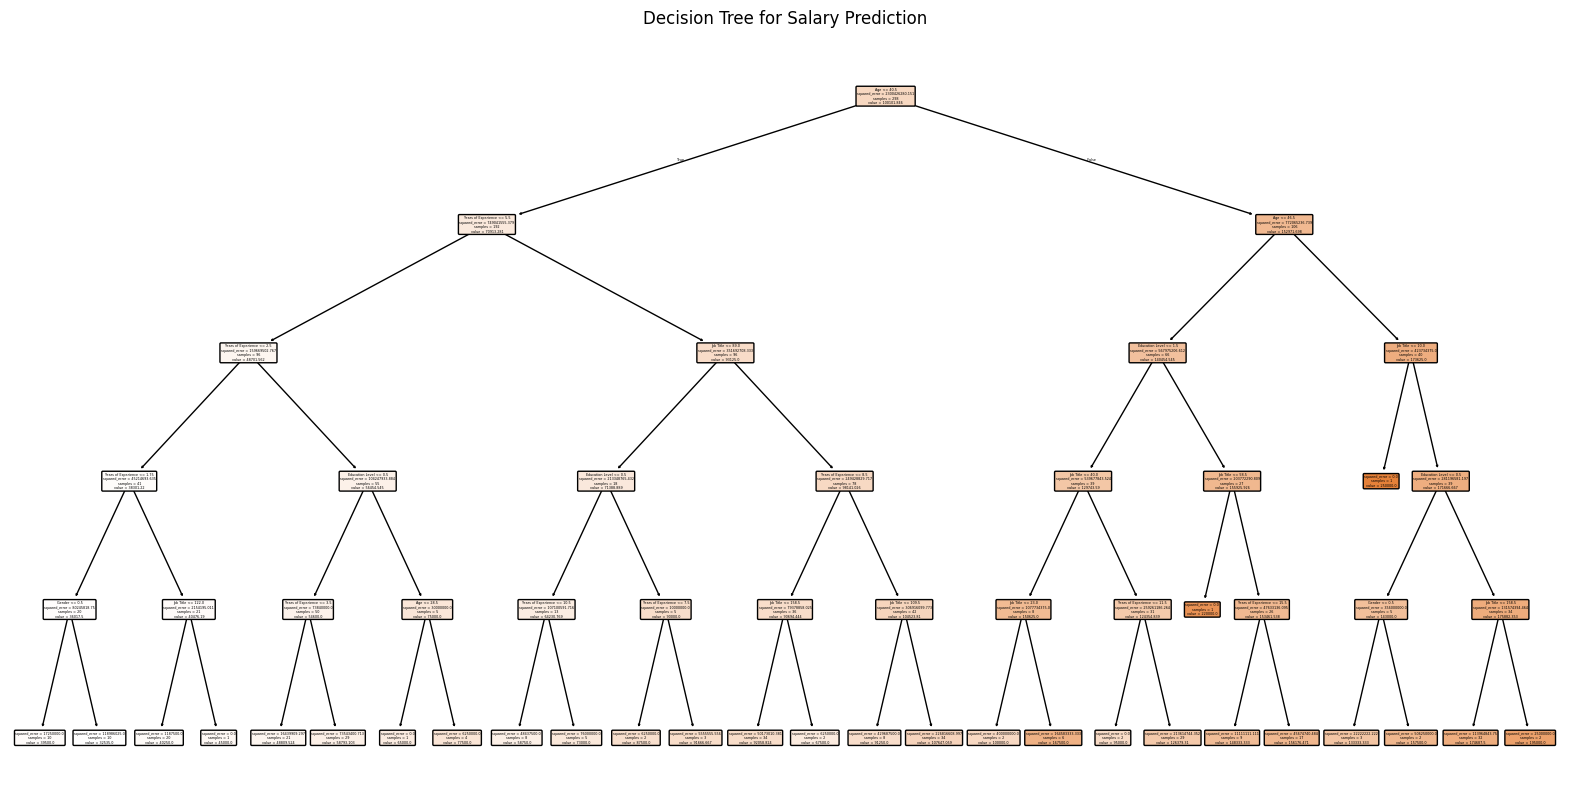

In [31]:
plt.figure(figsize=(20, 10))

plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True
)

plt.title("Decision Tree for Salary Prediction")
plt.show()
